In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
#read the datasets
bank_df=pd.read_csv("bank.csv",sep=";")
bank_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [3]:
cat_col=bank_df.select_dtypes(include="object").columns
num_col=bank_df.select_dtypes(exclude="object").columns


In [4]:
num_col

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

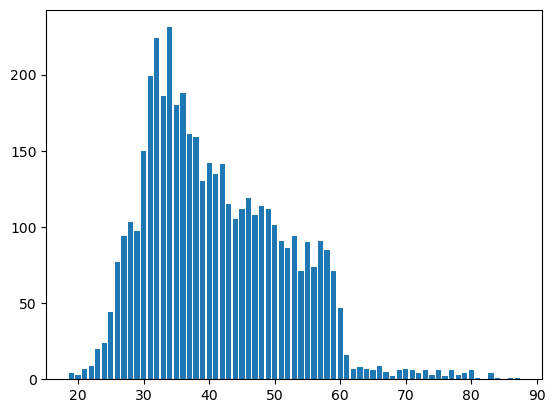

In [100]:
#uni-Variente Analysis
data=bank_df["age"].value_counts()
keys=data.keys()
values=data.values
df=pd.DataFrame(zip(keys,values),columns=["level","count"])
plt.bar("level","count",data=df)
plt.show()

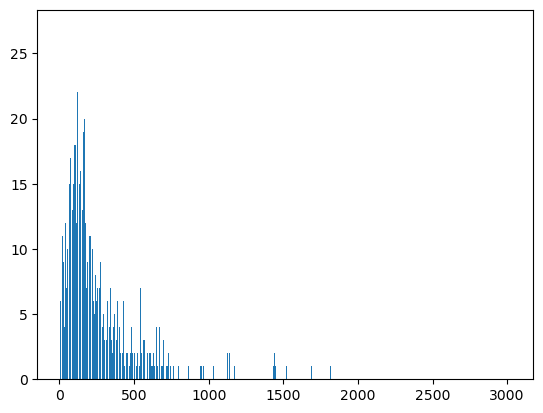

In [102]:
data=bank_df["duration"].value_counts()
keys=data.keys()
values=data.values
df=pd.DataFrame(zip(keys,values),columns=["level","count"])
plt.bar("level","count",data=df)
plt.show()

In [8]:
bank_df["age"].unique()

array([30, 33, 35, 59, 36, 39, 41, 43, 20, 31, 40, 56, 37, 25, 38, 42, 44,
       26, 55, 67, 53, 68, 32, 49, 78, 23, 52, 34, 61, 45, 48, 57, 54, 63,
       51, 29, 50, 27, 60, 28, 21, 58, 22, 46, 24, 77, 75, 47, 70, 65, 64,
       62, 66, 19, 81, 83, 80, 71, 72, 69, 79, 73, 86, 74, 76, 87, 84],
      dtype=int64)

In [9]:
bank_df["campaign"].value_counts()

campaign
1     1734
2     1264
3      558
4      325
5      167
6      155
7       75
8       56
9       30
10      27
11      22
12      21
13      17
14      10
15       9
16       8
17       7
18       7
25       4
19       3
20       3
28       3
24       3
32       2
21       2
23       2
22       2
31       1
29       1
50       1
30       1
44       1
Name: count, dtype: int64

In [10]:
bank_df["previous"].unique()

array([ 0,  4,  1,  3,  2,  5, 20,  7,  6, 10,  9,  8, 18, 19, 12, 13, 11,
       14, 15, 24, 17, 22, 23, 25], dtype=int64)

In [11]:
cat_col=bank_df.select_dtypes(include="object").columns
cat_col

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [12]:
#bi-variente Analysis(reletion between two columns)
indx=bank_df["job"].unique()
p1=[]
s1=[]
t1=[]
for i in bank_df["job"].unique():
    con1=bank_df["job"]==i
    con2=bank_df["education"]=="primary"
    con3=bank_df["education"]=="secondary"
    con4=bank_df["education"]=="tertiary"
    c1=con1&con2
    c2=con1&con3
    c3=con1&con4
    n1=len(bank_df[c1])
    n2=len(bank_df[c2])
    n3=len(bank_df[c3])
    p1.append(n1)
    s1.append(n2)
    t1.append(n3)
dfs=pd.DataFrame(zip(p1,s1,t1),columns=["primary","secondary","tritary"],index=indx)
dfs

,primary,secondary,tritary
unemployed,26,68,32
services,25,363,16
management,39,116,787
blue-collar,369,524,12
self-employed,15,76,88
technician,15,520,211
entrepreneur,26,58,73
admin.,17,393,51
student,2,47,19
housemaid,57,28,22


<Axes: >

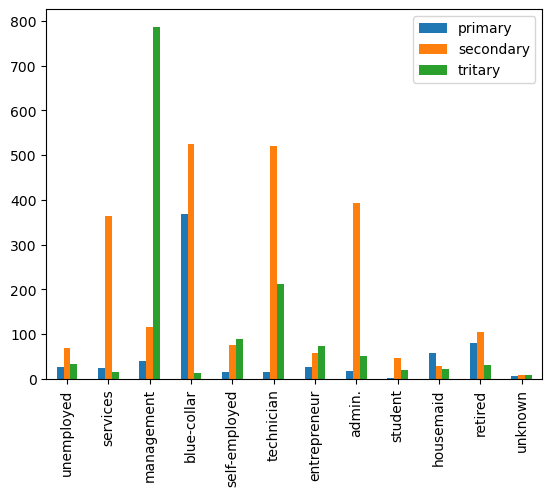

In [13]:
#plot 
dfs.plot(kind="bar")

In [14]:
#reletion between two columns 
indx=bank_df["job"]
col=bank_df["education"]
dfs2=pd.crosstab(indx,col)
dfs2

education,primary,secondary,tertiary,unknown
job,,,,
admin.,17,393,51,17
blue-collar,369,524,12,41
entrepreneur,26,58,73,11
housemaid,57,28,22,5
management,39,116,787,27
retired,80,105,31,14
self-employed,15,76,88,4
services,25,363,16,13
student,2,47,19,16


<Axes: xlabel='job'>

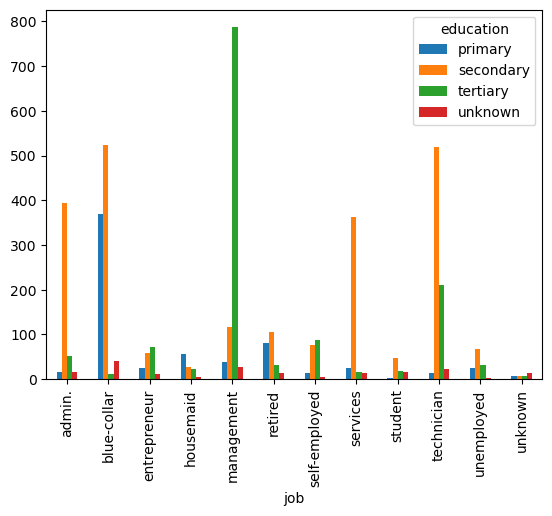

In [15]:
#plot
dfs2.plot(kind="bar")

In [16]:
#Multi-variente Analysis(reletion between more than two columns)
indx=bank_df["job"]
colm=[bank_df["education"],bank_df["housing"]]
dfs3=pd.crosstab(indx,colm)
dfs3


education     primary      secondary      tertiary      unknown    
housing            no  yes        no  yes       no  yes      no yes
job                                                                
admin.              7   10       134  259       25   26      10   7
blue-collar       111  258       120  404        6    6      14  27
entrepreneur       10   16        27   31       32   41       5   6
housemaid          36   21        18   10       14    8       5   0
management         18   21        43   73      391  396      14  13
retired            68   12        78   27       23    8      11   3
self-employed       5   10        37   39       51   37       2   2
services            8   17       116  247        5   11       3  10
student             2    0        36   11       12    7      14   2
technician          7    8       225  295      102  109      10  12
unemployed         17    9        34   34       18   14       1   1
unknown             6    1         8    0        8    0      15   0

<Figure size 2000x1000 with 0 Axes>

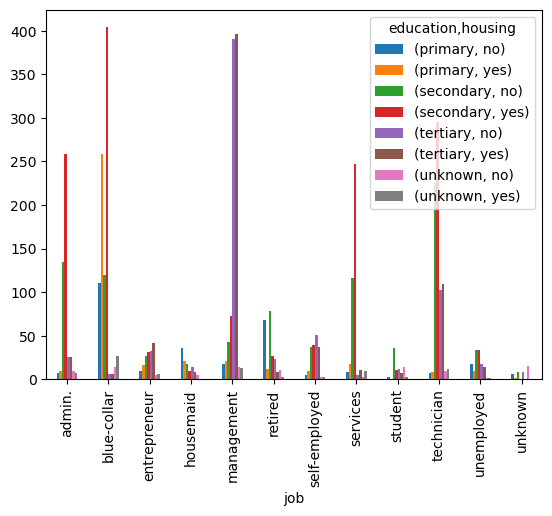

In [17]:
#plot
plt.figure(figsize=(20,10))
dfs3.plot(kind="bar")
plt.show()

**Numerical column to Numerical column Analysis**

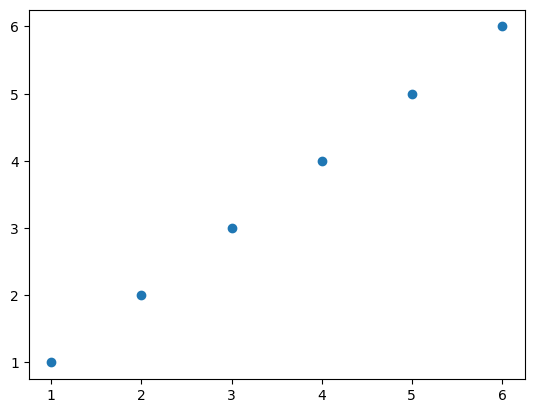

In [19]:
x=[1,2,3,4,5,6]
y=[1,2,3,4,5,6]
plt.scatter(x,y)
plt.show()

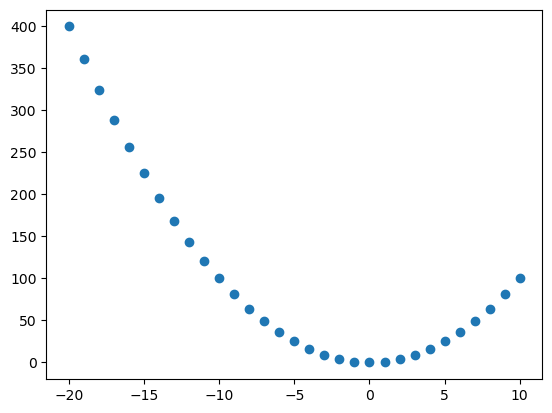

In [20]:
l1=[i for i in range(-20,11)]
l2=[i*i for i in l1]
plt.scatter(l1,l2)
plt.show()

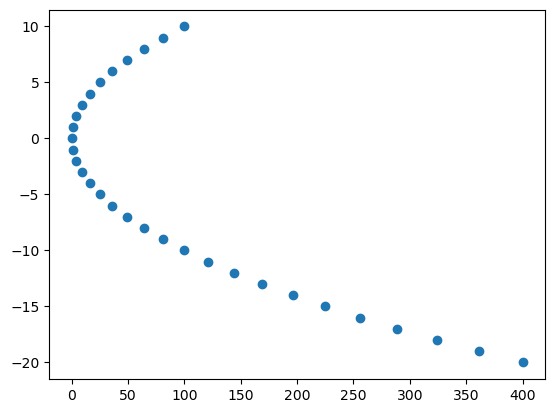

In [21]:
l1=[i for i in range(-20,11)]
l2=[i*i for i in l1]
plt.scatter(l2,l1)
plt.show()

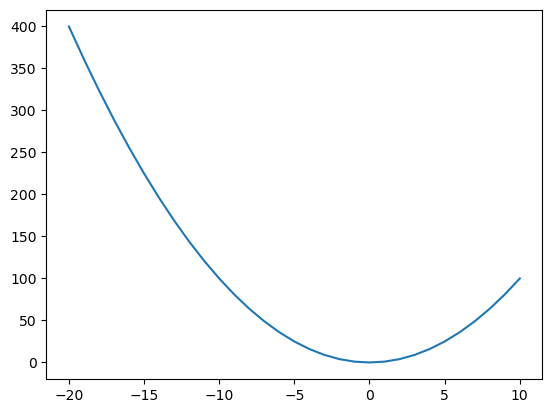

In [22]:
l1=[i for i in range(-20,11)]
l2=[i*i for i in l1]
plt.plot(l1,l2)
plt.show()

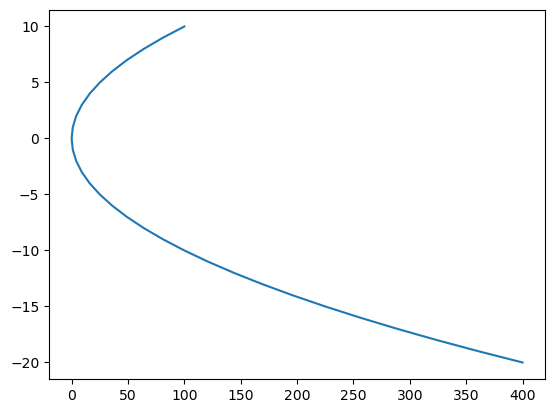

In [23]:
l1=[i for i in range(-20,11)]
l2=[i*i for i in l1]
plt.plot(l2,l1)
plt.show()

In [24]:
num_col

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

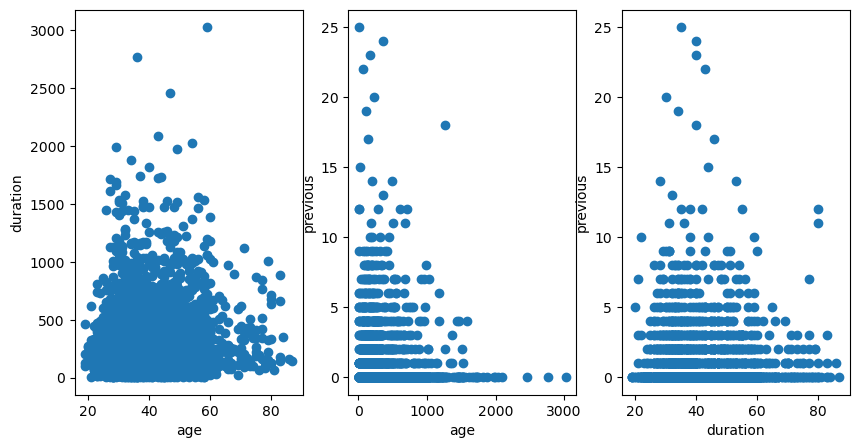

In [25]:
#plot scatter (showing the relation between two columns)

emp=bank_df['age']
yr=bank_df['duration']
pw=bank_df['previous']
plt.figure(figsize=(10,5))

################################
plt.subplot(1,3,1)
plt.scatter(emp,yr)
plt.xlabel("age")
plt.ylabel("duration")

#############################
plt.subplot(1,3,2)
plt.scatter(yr,pw)
plt.xlabel("age")
plt.ylabel("previous")

################################
plt.subplot(1,3,3)
plt.scatter(emp,pw)
plt.xlabel("duration")
plt.ylabel("previous")
plt.show()

In [26]:
#correleation:corr
dfn=bank_df.corr(numeric_only=True)
dfn

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.083820,-0.017853,-0.002367,-0.005148,-0.008894,-0.003511
balance,0.083820,1.000000,-0.008677,-0.015950,-0.009976,0.009437,0.026196
day,-0.017853,-0.008677,1.000000,-0.024629,0.160706,-0.094352,-0.059114
duration,-0.002367,-0.015950,-0.024629,1.000000,-0.068382,0.010380,0.018080
campaign,-0.005148,-0.009976,0.160706,-0.068382,1.000000,-0.093137,-0.067833
pdays,-0.008894,0.009437,-0.094352,0.010380,-0.093137,1.000000,0.577562
previous,-0.003511,0.026196,-0.059114,0.018080,-0.067833,0.577562,1.000000


<Axes: >

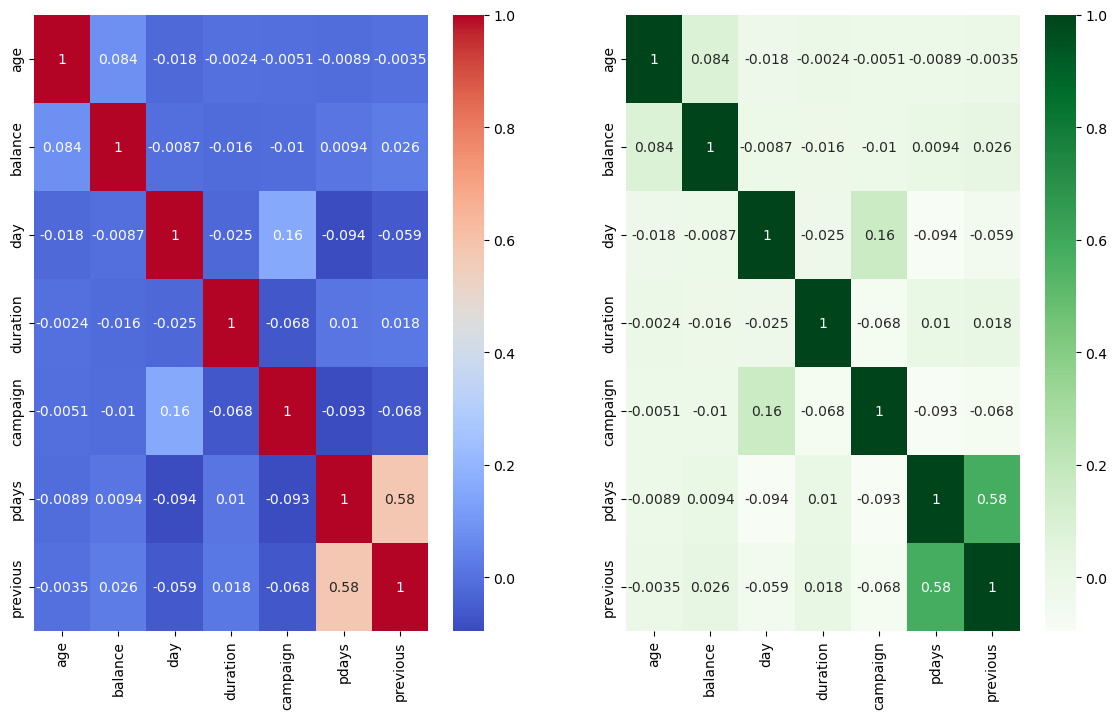

In [27]:
#ploting heatmap to showing correletion between columns
#using package seborn
plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
sns.heatmap(dfn,annot=True,cmap="coolwarm")

plt.subplot(1,2,2)
sns.heatmap(dfn,annot=True,cmap="Greens")

**Categorical columns to Categorical columms Analysis**

In [29]:
cat_col

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [30]:
bank_df["job"].value_counts

<bound method IndexOpsMixin.value_counts of 0          unemployed
1            services
2          management
3          management
4         blue-collar
            ...      
4516         services
4517    self-employed
4518       technician
4519      blue-collar
4520     entrepreneur
Name: job, Length: 4521, dtype: object>

In [31]:
bank_df["education"].value_counts()

education
secondary    2306
tertiary     1350
primary       678
unknown       187
Name: count, dtype: int64

In [108]:
l=[]
for i in bank_df["job"].unique():
        for j in bank_df["education"].unique():
            con1=bank_df["job"]==i
            con2=bank_df["education"]==j
            con=con1 &con2
            l.append(bank_df[con][["job","education"]])


In [33]:
bank_df["marital"].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [34]:
l1=[]
l2=[]
l3=[]
for i in bank_df["marital"].unique():
    con1= bank_df["marital"]==i
    con2=bank_df["education"]=="primary"
    con3=bank_df["education"]=="secondary"
    con4=bank_df["education"]=="tertiary"
    p1=con1 & con2
    p2=con1 & con3
    p3=con1 & con4
    
    n_p1=len(bank_df[p1])
    n_p2=len(bank_df[p2])
    n_p3=len(bank_df[p3])
    l1.append(n_p1)
    l2.append(n_p2)
    l3.append(n_p3)
dfs1=pd.DataFrame(zip(l1,l2,l3),columns=["primary","secondary","tertiary"],index=bank_df["marital"].unique())
dfs1

,primary,secondary,tertiary
married,526,1427,727
single,73,609,468
divorced,79,270,155


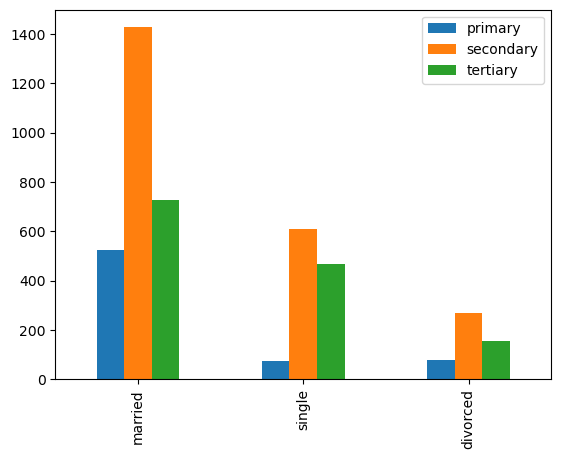

In [35]:
dfs1.plot(kind="bar")
plt.show()

In [36]:
l1=[]
l2=[]
l3=[]
for i in bank_df["job"].unique():
    con1= bank_df["job"]==i
    con2=bank_df["education"]=="primary"
    con3=bank_df["education"]=="secondary"
    con4=bank_df["education"]=="tertiary"
    p1=con1 & con2
    p2=con1 & con3
    p3=con1 & con4
    
    n_p1=len(bank_df[p1])
    n_p2=len(bank_df[p2])
    n_p3=len(bank_df[p3])
    l1.append(n_p1)
    l2.append(n_p2)
    l3.append(n_p3)
dfs2=pd.DataFrame(zip(l1,l2,l3),columns=["primary","secondary","tertiary"],index=bank_df["job"].unique())
dfs2

,primary,secondary,tertiary
unemployed,26,68,32
services,25,363,16
management,39,116,787
blue-collar,369,524,12
self-employed,15,76,88
technician,15,520,211
entrepreneur,26,58,73
admin.,17,393,51
student,2,47,19
housemaid,57,28,22


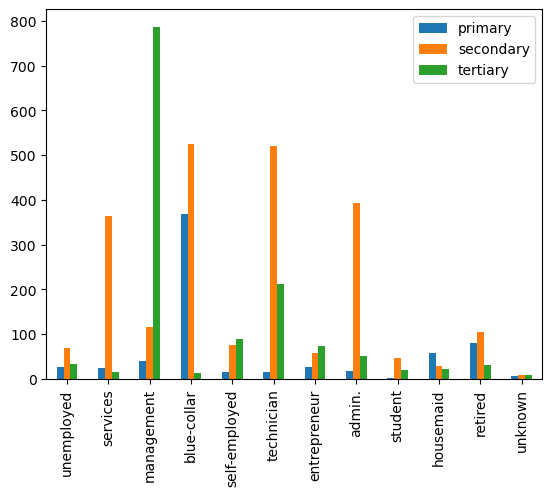

In [37]:
dfs2.plot(kind="bar")
plt.show()

In [38]:
#<pandas package><crosstab> 
#deal categorical- categorical

index=bank_df["job"]
column=bank_df["education"]
dfs3=pd.crosstab(index,column)
dfs3

education,primary,secondary,tertiary,unknown
job,,,,
admin.,17,393,51,17
blue-collar,369,524,12,41
entrepreneur,26,58,73,11
housemaid,57,28,22,5
management,39,116,787,27
retired,80,105,31,14
self-employed,15,76,88,4
services,25,363,16,13
student,2,47,19,16


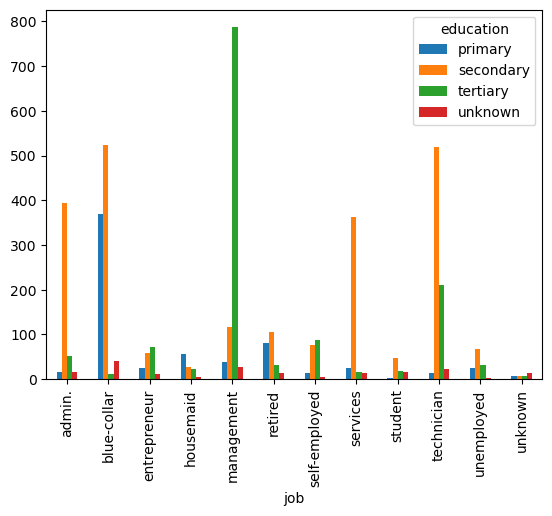

In [39]:
dfs3.plot(kind="bar")
plt.show()

**Categorical columns to Numerical Columns Analysis**

In [41]:
#categorical
cat_col

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [42]:
#Numerical
num_col

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [43]:
num=bank_df["day"].unique()
num

array([19, 11, 16,  3,  5, 23, 14,  6, 17, 20, 13, 30, 29, 27,  7, 18, 12,
       21, 26, 22,  2,  4, 15,  8, 28,  9,  1, 10, 31, 25, 24],
      dtype=int64)

In [44]:
cal=bank_df["job"].unique()
cal

array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown'], dtype=object)

In [45]:
#changing numerical to cotegorical 

unique_labels=bank_df["job"].unique()
list1=[i for i in range(len(unique_labels))]

dict1= dict(zip(unique_labels,list1))
bank_df["job_numeric"]=bank_df["job"].map(dict1)

bank_df[["job","job_numeric"]]

,job,job_numeric
0,unemployed,0
1,services,1
2,management,2
3,management,2
4,blue-collar,3
...,...,...
4516,services,1
4517,self-employed,4
4518,technician,5
4519,blue-collar,3


In [46]:
#changing numerical to cotegorical 

unique_labels=bank_df["education"].unique()
list1=[i for i in range(len(unique_labels))]

dict1={key:values for key,values in zip(unique_labels,list1)}
bank_df["education_numeric"]=bank_df["education"].map(dict1)

bank_df[["education","education_numeric"]]

,education,education_numeric
0,primary,0
1,secondary,1
2,tertiary,2
3,tertiary,2
4,secondary,1
...,...,...
4516,secondary,1
4517,tertiary,2
4518,secondary,1
4519,secondary,1


In [47]:
bank_df=pd.read_csv("bank.csv",sep=";")   #changing all the categorical columns into numerical  
for i in cat_col:
    unique_labels=bank_df[i].unique()
    list1=[i for i in range(len(unique_labels))]
    
    dict1= dict(zip(unique_labels,list1))
    bank_df[f"{i}_numeric"]=bank_df[i].map(dict1)

bank_df

,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_numeric,marital_numeric,education_numeric,default_numeric,housing_numeric,loan_numeric,contact_numeric,month_numeric,poutcome_numeric,y_numeric
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,...,0,0,0,0,0,0,0,0,0,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,...,1,0,1,0,1,1,0,1,1,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,...,2,1,2,0,1,0,0,2,1,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,...,2,0,2,0,1,1,1,3,0,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,...,3,0,1,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,...,1,0,1,0,1,0,0,7,0,0
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,...,4,0,2,1,1,1,1,1,0,0
4518,57,technician,married,secondary,no,295,no,no,cellular,19,...,5,0,1,0,0,0,0,5,0,0
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,...,3,0,1,0,0,0,0,4,2,0


In [48]:
bank_df=pd.read_csv("bank.csv",sep=";")   #changing all the categorical columns into numerical  
for i in cat_col:
    unique_labels=bank_df[i].unique()
    list1=[i for i in range(len(unique_labels))]
    
    dict1= dict(zip(unique_labels,list1))
    bank_df[i]=bank_df[i].map(dict1)

bank_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,0,0,0,0,1787,0,0,0,19,0,79,1,-1,0,0,0
1,33,1,0,1,0,4789,1,1,0,11,1,220,1,339,4,1,0
2,35,2,1,2,0,1350,1,0,0,16,2,185,1,330,1,1,0
3,30,2,0,2,0,1476,1,1,1,3,3,199,4,-1,0,0,0
4,59,3,0,1,0,0,1,0,1,5,1,226,1,-1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,1,0,1,0,-333,1,0,0,30,7,329,5,-1,0,0,0
4517,57,4,0,2,1,-3313,1,1,1,9,1,153,1,-1,0,0,0
4518,57,5,0,1,0,295,0,0,0,19,5,151,11,-1,0,0,0
4519,28,3,0,1,0,1137,0,0,0,6,4,129,4,211,3,2,0


In [49]:
###################Numerical use for train machaine learing model#####################

In [50]:
# Thank you !